**Noise Cancellation Using Digital Filter**

We use digital filter to model a system and in the process remove correlated signal passed from the system (Noise) leaving behind filtered signal

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import math

In [3]:
# FIR filter

def filter(w1,w2,w3,x1,x2,x3):
    return w1*x1+w2*x2+w3*x3

In [4]:
# Original_signal

fs = 1000  
t = np.linspace(0, 2, fs, endpoint=False)  
original_signal = np.sin(2 * np.pi * 5 * t) 

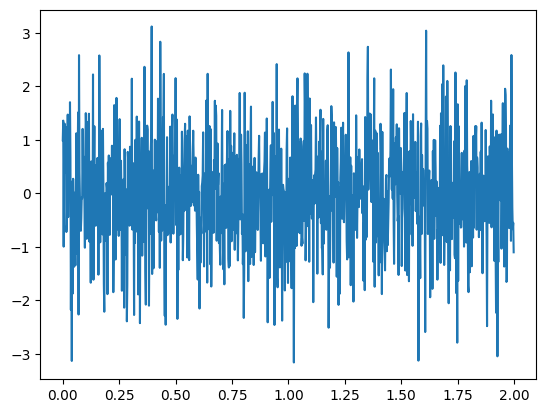

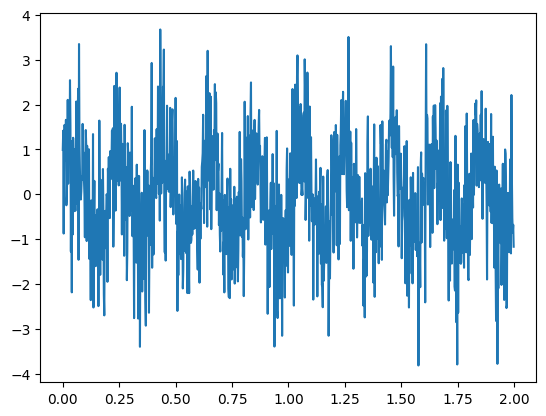

In [5]:
# Adding noise to the signal

noise =  1 * np.random.normal(size=len(t)) 
noised_signal = noise + original_signal

plt.plot(t, noise)
plt.show()

plt.plot(t, noised_signal)
plt.show()


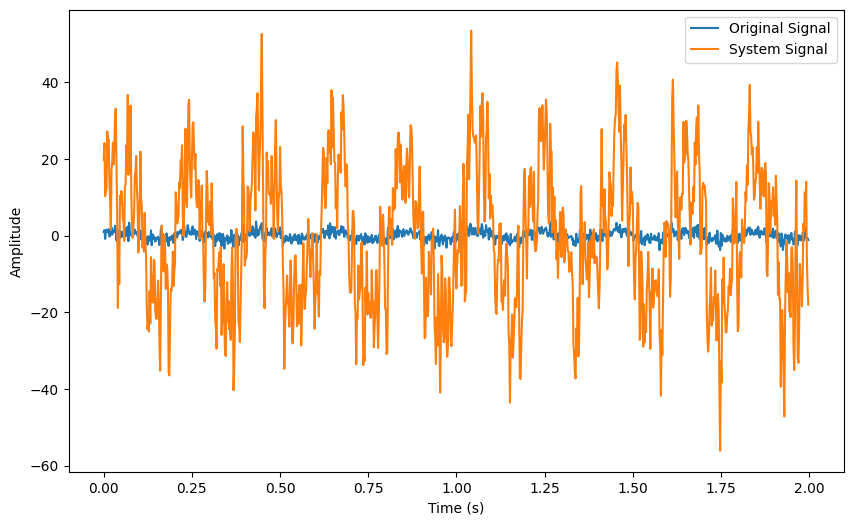

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def system(signal, window_size):
    filtered_signal = np.zeros_like(signal)
    for i in range(len(signal)):
        start = max(0, i - window_size + 1)
        end = i + 1
        filtered_signal[i] = (np.mean(signal[start:end]))*20
    return filtered_signal


window_size = 3
system_signal = system(noised_signal, window_size)
plt.figure(figsize=(10, 6))
plt.plot(t, noised_signal, label='Original Signal')
plt.plot(t, system_signal, label='System Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


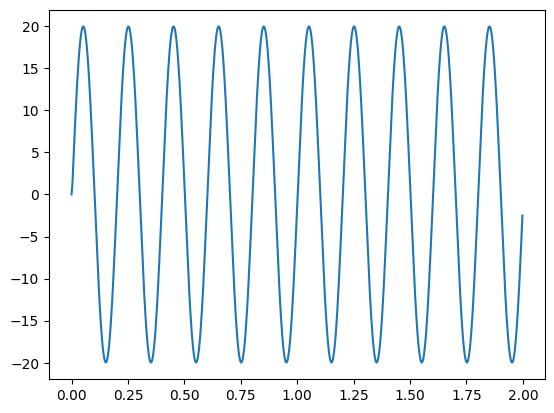

In [7]:
# Original Signal through system

original_system_signal = system(original_signal,window_size)
plt.plot(t, original_system_signal, label='Original System Signal')

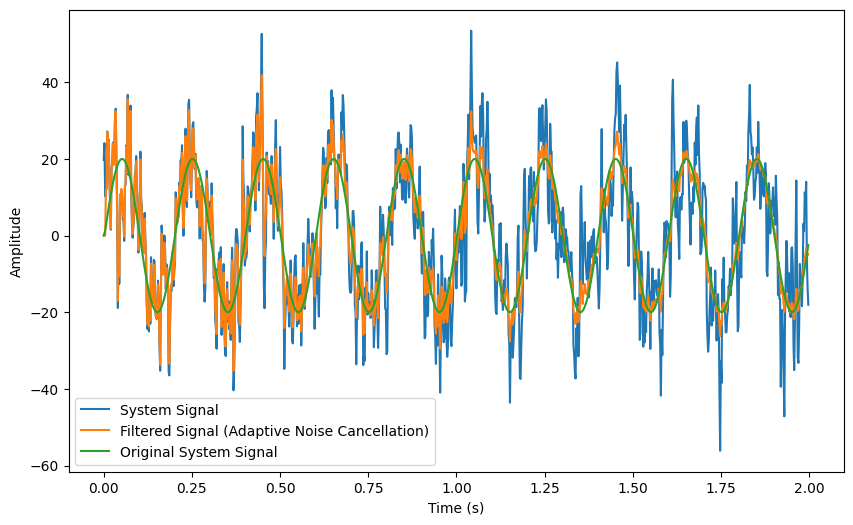

[0.56838527 0.56790539 0.5670148 ]


In [8]:
def adaptive_noise_cancellation(primary_signal, noise_reference, mu, filter_length):
    N = len(primary_signal)
    filtered_signal = np.zeros(N)
    w = np.zeros(filter_length)  

    for i in range(filter_length, N):
        x = noise_reference[i-filter_length+1:i+1][::-1]  
        d = primary_signal[i] 

        y = np.dot(w, x) 
        error = d - y  

        w = w + 2 * mu * error * x  
        filtered_signal[i] = primary_signal[i] - y 

    return (filtered_signal,w)


mu = 0.00001
filter_length = 3
filtered_signal, weights  = adaptive_noise_cancellation(system_signal, 10*noise, mu, filter_length)


plt.figure(figsize=(10, 6))
plt.plot(t, system_signal, label='System Signal')
plt.plot(t, filtered_signal, label='Filtered Signal (Adaptive Noise Cancellation)')
plt.plot(t, original_system_signal, label='Original System Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print(weights)
